<a href="https://colab.research.google.com/github/asra020601/ds_salaries/blob/main/ds_salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Over the years, there has been a significant upward trend in salaries for data science. This is due to several factors, including the increasing demand for skilled professionals in these fields, the rapid growth of technology and data-driven industries, and the scarcity of talent with the necessary skills and expertise. However, it's important to note that salaries can vary significantly depending on factors such as location, industry, company size, and individual experience and skills.In this project I discuss the trends and patterns in data science salaries over the years. This dataset was downloaded from kaggle.com.

Data Science Job Salaries Dataset contains 11 columns, each are:
work_year,  experience_level, employment_type,  job_title, salary, salary_currency, salaryinusd, employee_residence, remote_ratio, company_location, company_size.

# **BASIC UNDERSTANDING**

Importing important libraries.

In [2]:
import pandas as pd #importing all the import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime

Reading the dataset using pandas.

In [3]:
df = pd.read_csv('/content/ds_salaries.csv') #loading the data

In [ ]:
df.head(3)

In [4]:
df['work_year'] = pd.to_datetime(df['work_year'], format='%Y')

In [5]:
df['work_year'] = df['work_year'].dt.strftime('%Y')

Gathering some fundamental information about the dataset.





In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   object
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(3), object(8)
memory usage: 322.8+ KB


In [ ]:
df.describe()

,salary,salary_in_usd,remote_ratio
count,3.755000e+03,3755.000000,3755.000000
mean,1.906956e+05,137570.389880,46.271638
std,6.716765e+05,63055.625278,48.589050
min,6.000000e+03,5132.000000,0.000000
25%,1.000000e+05,95000.000000,0.000000
50%,1.380000e+05,135000.000000,0.000000
75%,1.800000e+05,175000.000000,100.000000
max,3.040000e+07,450000.000000,100.000000


In [ ]:
df.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Checking for any defects/errors in the dataset.

In [ ]:
df.nunique() #checking the unique values

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [ ]:
df.isnull().sum() #checking for null values

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df['work_year'].unique()

array(['2023', '2022', '2020', '2021'], dtype=object)

# **VISUALIZATION**

## **UNIVARIATE**

Salary in US Dollar is mostly normally distributed although a tiny bit of right skew can be observed. A peak can be observed around 137570 which is also the mean/median salary.

In [ ]:
print(df['salary_in_usd'].mean())

137570.38988015978


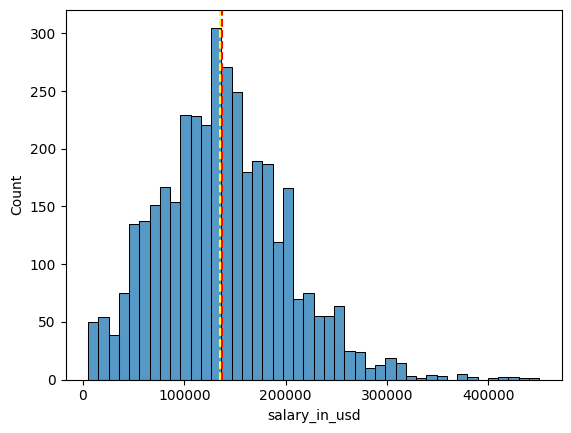

In [7]:
sns.histplot(df['salary_in_usd'])
plt.axvline(x=df['salary_in_usd'].mean(),
            color='red', linestyle= '--')
plt.axvline(x=df['salary_in_usd'].median(),
            color='yellow', linestyle = '--')
plt.show()

Below chart shows that salary has some outliers. I have decided to not delete these outliers because these represent interesting phenomena that are worth exploring further, removing them can distort the distribution and skew the results and removing outliers can introduce bias into the analysis and compromise the validity of the results.

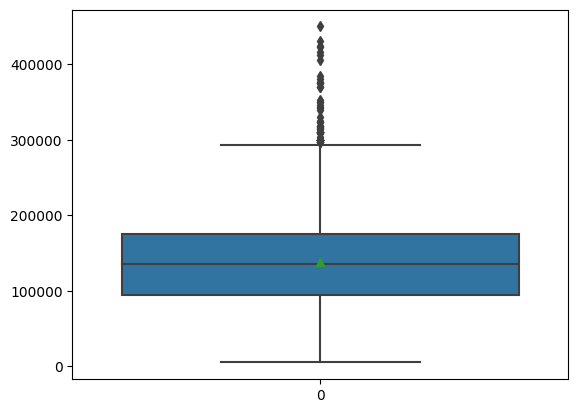

In [8]:
sns.boxplot(df['salary_in_usd'],showmeans=True)
plt.show()

Based on the bar chart presented below, it is evident that the dataset contains a larger volume of data for the year 2023 compared to the years 2020 and 2021. Notably, an abrupt and atypical surge in the frequency of work years is observed after the year 2021.

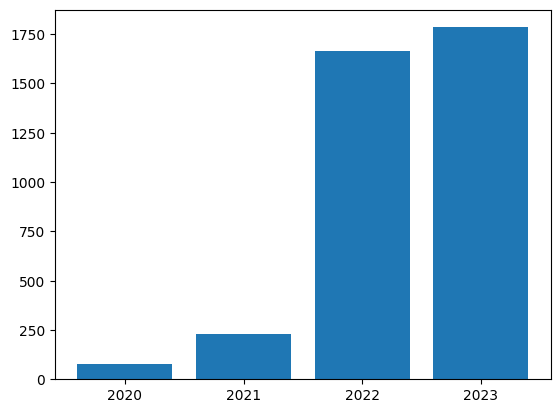

In [ ]:
df1 = df.groupby('work_year').size()
df1 = dict(df1)
year = list(df1.keys())
freq = list(df1.values())
plt.bar(range(len(df1)), freq, tick_label=year)
plt.show()

The analysis reveals that a significant majority of individuals within this dataset hold senior-level positions, constituting the predominant segment. Conversely, executives make up only a mere 3% of the total population represented in the dataset.

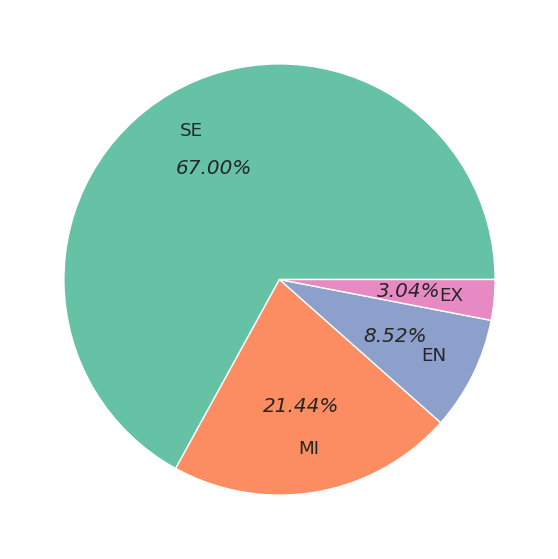

In [ ]:
dict_df_exp_3 =df['experience_level'].value_counts(normalize=True) * 100
dict_df_exp = dict(dict_df_exp_3)
exp_label = list(dict_df_exp .keys())
sns.set(font_scale = 1.2)
plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(
    x=dict_df_exp_3 ,
    labels=exp_label,
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    labeldistance=0.8,
    # Distance of percent labels from the center
    pctdistance=0.6
)

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center')

# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')

plt.show()

Nearly the entirety of the employees included in this dataset are engaged in full-time employment, indicating a prevailing trend of full-time work among the individuals captured in the data.

In [ ]:
df['employment_type'].value_counts(normalize=True)

FT    0.990146
PT    0.004527
CT    0.002663
FL    0.002663
Name: employment_type, dtype: float64

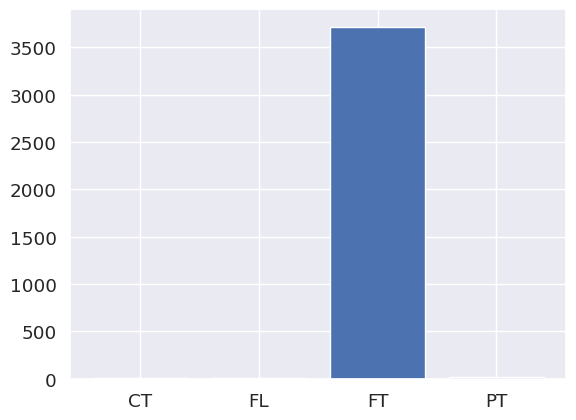

{'CT': 10, 'FL': 10, 'FT': 3718, 'PT': 17}

In [ ]:
df1 = df.groupby('employment_type').size()
df1 = dict(df1)
year = list(df1.keys())
freq = list(df1.values())
plt.bar(range(len(df1)), freq, tick_label=year)
plt.show()


The data reveals that the role of Data Engineer holds the highest level of popularity within this industry. Notably, there is a significant level of saturation observed among the job roles of Data Engineers, Data Scientists, and Data Analysts, indicating a strong presence and demand for professionals in these particular positions.

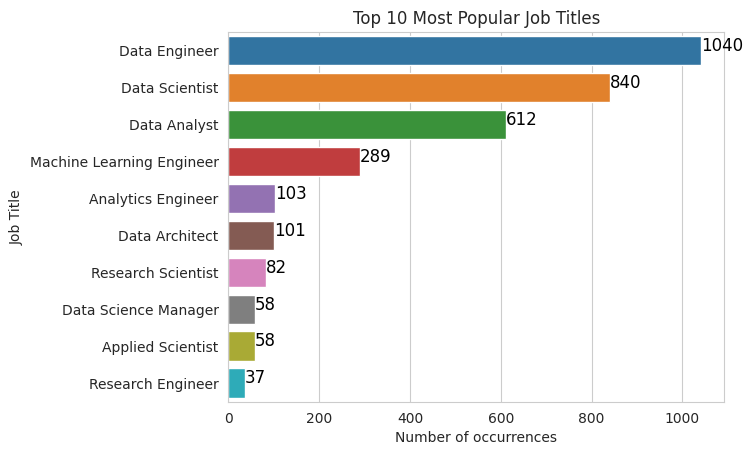

In [9]:
job_title_count = df['job_title'].value_counts()
job_title_count = job_title_count[:10]
sns.set_style("whitegrid")
sns.barplot(x=job_title_count.values, y=job_title_count.index)
plt.title('Top 10 Most Popular Job Titles')
plt.xlabel('Number of occurrences')
plt.ylabel('Job Title')
for i, v in enumerate(job_title_count.values):
    plt.text(v, i, str(v), color='black', fontsize=12)


The treemap visualization provides an overview of the distribution of job titles within this dataset based on their respective frequencies. As previously mentioned, the data indicates that the job title of Data Engineer holds the highest frequency, indicating its popularity and prevalence within the dataset. Following closely behind are the job titles of Data Scientist and Data Analyst, suggesting a significant presence of professionals in these roles as well.

In [ ]:
import plotly.express as px
ex_level = df['job_title'].value_counts()
fig = px.treemap(ex_level, path = [ex_level.index], values = ex_level.values,
                title = 'Experience Level')
fig.show()

To simplify the analysis and enhance visualization and coding efficiency, we have categorized the numerous job titles into five main overarching categories. This categorization allows for a more concise representation of the data and facilitates easier interpretation and handling of the information.

In [10]:
df['job_title'].unique()
def assign_broader_category(job_title):
  data_scientist = ['Principal Data Scientist','Data Scientist','Applied Scientist','Applied Data Scientist',
 'Data Science Manager','Director of Data Science', 'Lead Data Scientist',
 'Data Science Lead', 'Data Science Consultant','Head of Data Science',
 'Data Science Engineer', 'Data Science Tech Lead', 'Data Scientist Lead',
 'Product Data Scientist','Staff Data Scientist']
  data_engineer = [ 'Data Modeler', 'Data Strategist', 'Data Engineer', 'Data Architect', 'Data DevOps Engineer',
  'Head of Data',  'Data Manager','Data Operations Engineer','Azure Data Engineer',
  'Big Data Engineer', 'Cloud Database Engineer','Marketing Data Engineer', 'Data Lead',
  'Data Infrastructure Engineer', 'Software Data Engineer','Data Specialist',
  'BI Data Engineer','BI Developer','Big Data Architect','Cloud Data Engineer',
  'Data Operations Analyst', 'Power BI Developer','Principal Data Architect',
  'Cloud Data Architect', 'Lead Data Engineer','Principal Data Engineer']
  machine_learning= ['ML Engineer','Machine Learning Engineer',
 'Applied Machine Learning Engineer','Machine Learning Researcher','Machine Learning Scientist',
 'MLOps Engineer', 'AI Scientist','AI Developer','Applied Machine Learning Scientist',
 'AI Programmer','Deep Learning Researcher',  'Machine Learning Infrastructure Engineer',
 'Deep Learning Engineer', 'Machine Learning Software Engineer','Machine Learning Research Engineer',
 'NLP Engineer','Machine Learning Developer', 'Principal Machine Learning Engineer',
 'Machine Learning Manager', 'Lead Machine Learning Engineer','Head of Machine Learning']
  data_analyst = ['Data Analyst','Analytics Engineer','Data Quality Analyst','Compliance Data Analyst',
 'Data Analytics Manager','Business Data Analyst','Staff Data Analyst',
 'Lead Data Analyst','Financial Data Analyst','BI Analyst','Product Data Analyst',
 'Data Analytics Lead', 'Data Analytics Specialist','BI Data Analyst','Insight Analyst',
 'Data Analytics Engineer','Data Analytics Consultant', 'Marketing Data Analyst',
 'Principal Data Analyst', 'Finance Data Analyst']
  if job_title in data_engineer:
        return "Data Engineer"
  elif job_title in data_scientist:
        return "Data Scientist"
  elif job_title in machine_learning:
        return "ML Engineer"
  elif job_title in data_analyst:
        return "Data Analyst"
  else:
        return "Other"


df['job_category'] = df['job_title'].apply(assign_broader_category)

The ranking of job frequencies by category further reinforces the observation that Data Engineer remains the most prevalent job within the dataset. Despite the categorization of job titles into broader categories, Data Engineer maintains its position as the most frequently occurring job across all categories.

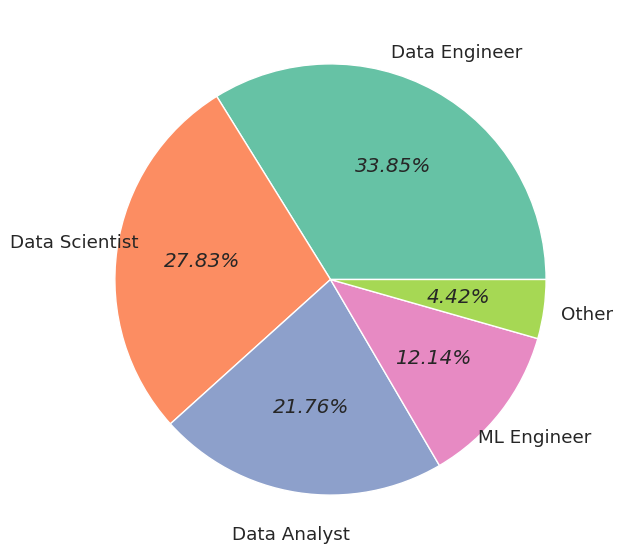

In [11]:
dict_df_exp_3 =df['job_category'].value_counts(normalize=True) * 100
dict_df_exp = dict(dict_df_exp_3)
exp_label = list(dict_df_exp .keys())
sns.set(font_scale = 1.2)
plt.figure(figsize=(7,7))
patches, texts, autotexts = plt.pie(
    x=dict_df_exp_3 ,
    labels=exp_label,
    autopct='%1.2f%%',
    colors=sns.color_palette('Set2'),
    labeldistance=1.2,
    # Distance of percent labels from the center
    pctdistance=0.6
)

# Customize text labels
for text in texts:
    text.set_horizontalalignment('center')

# Customize percent labels
for autotext in autotexts:
    autotext.set_horizontalalignment('center')
    autotext.set_fontstyle('italic')

plt.show()

## **BIVARIATE**

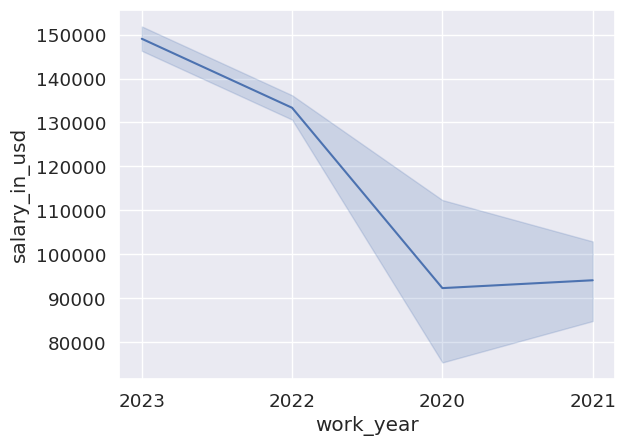

In [ ]:
sns.lineplot(x= df['work_year'],y = df['salary_in_usd'])
plt.show()

Finally, we compare salary distribution with the company size. The small companies' salary curve shows a right skew distribution which implies the mean is greater than the median. The mean overestimates the most common values in a positively skewed distribution. The medium sized companies' salary curve hits peak at 138k and a normal distribution is observed. Large companies salary curve also shows a steep right skew curve. All the companies intersect at one point around 97k.

In [ ]:
import plotly.figure_factory as ff
fig1 = ff.create_distplot([df[df['company_size'] == c]['salary_in_usd'] for c in df['company_size'].unique()], group_labels=df['company_size'].unique(), show_hist=False)
fig1.update_layout(title='Salary Distribution by Company Size', xaxis_title='Salary in USD')
fig1.show()

Density wise smaller companies' salary are dense between 0 to 130 thousand whereas middle sized companies' salary are more dense from 50 thousand to 300 thousand. Meanwhile large company salaries range from 0 to 250 thousand.

Herein lies an analysis showcasing the relative frequencies of job categories in correlation with salaries denominated in USD.

<ipython-input-16-bfee52be4662>:1: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



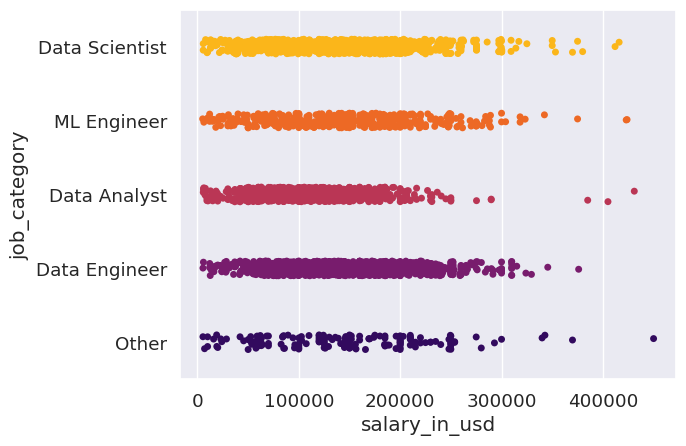

In [16]:
sns.stripplot(y=df['job_category'],x=df['salary_in_usd'], palette = 'inferno_r')
plt.show()

In [ ]:
df[df['salary_in_usd']==max(df['salary_in_usd'])]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_category
3522,2020,MI,FT,Research Scientist,450000,USD,450000,US,0,US,M,Other


Please find below a plot representing the top ten individual job titles with the highest remuneration within this dataset.

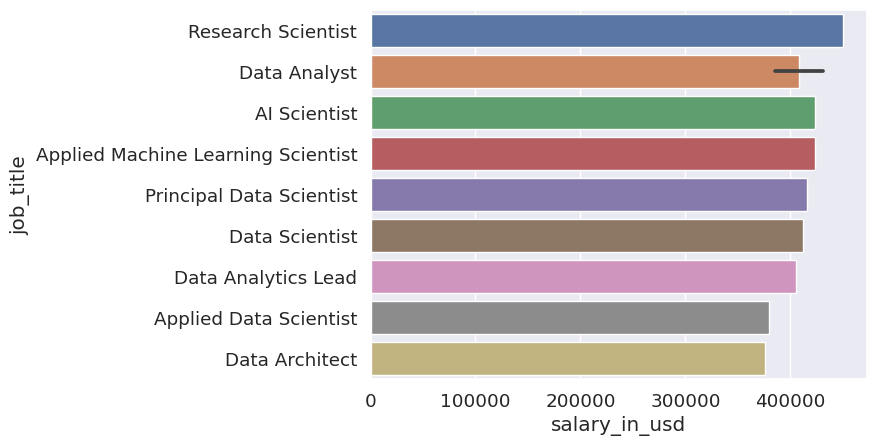

In [29]:
df1 = df.copy()
df1.sort_values("salary_in_usd", axis = 0, ascending = False,
                 inplace = True, na_position ='last')

sns.barplot(y=df1['job_title'][:10],x=df1['salary_in_usd'][:10],orient = 'h')

plt.show()

This graph depicts a comparison of the top ten countries, based on employees' residence, where salaries are highest and lowest.

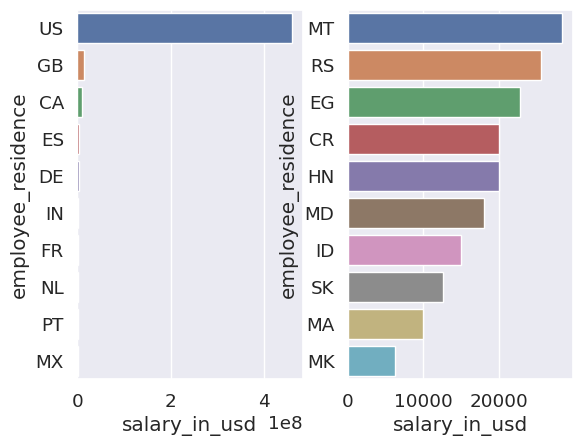

In [25]:
employ_res = df[['employee_residence','salary_in_usd']]
employ_res = employ_res.groupby('employee_residence').sum().reset_index()
employ_res.sort_values("salary_in_usd", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
plt.subplot(1, 2, 1)
sns.barplot(y=employ_res['employee_residence'][:10], x = employ_res['salary_in_usd'][:10],orient = 'h')
plt.subplot(1, 2, 2)
sns.barplot(y=employ_res['employee_residence'][-10:], x= employ_res['salary_in_usd'][-10:],orient = 'h')
plt.show()

A comparison is presented between the top ten countries where companies offer the highest remuneration and the top ten countries where compensation is comparatively lower.

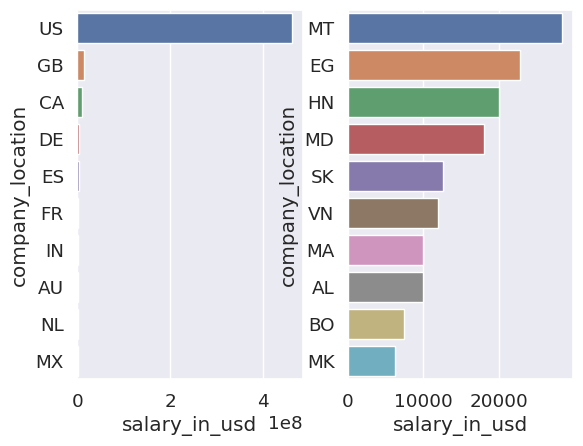

In [26]:
comp_res = df[['company_location','salary_in_usd']]
comp_res = comp_res.groupby('company_location').sum().reset_index()
comp_res.sort_values("salary_in_usd", axis = 0, ascending = False,
                 inplace = True, na_position ='last')
plt.subplot(1, 2, 1)
sns.barplot(y=comp_res['company_location'][:10], x = comp_res['salary_in_usd'][:10],orient = 'h')
plt.subplot(1, 2, 2)
sns.barplot(y=comp_res['company_location'][-10:], x = comp_res['salary_in_usd'][-10:],orient = 'h')
plt.show()

## **MULTIVARIATE**

This shows that some executives (outliers) were paid unnaturally high in the year 2020. The entry level employees are paid the least in comparison with others but a steady growth can be every year in entry level salaries. The upward trend in the senior, mid level and entry is almost identical.


<Axes: xlabel='experience_level', ylabel='salary_in_usd'>

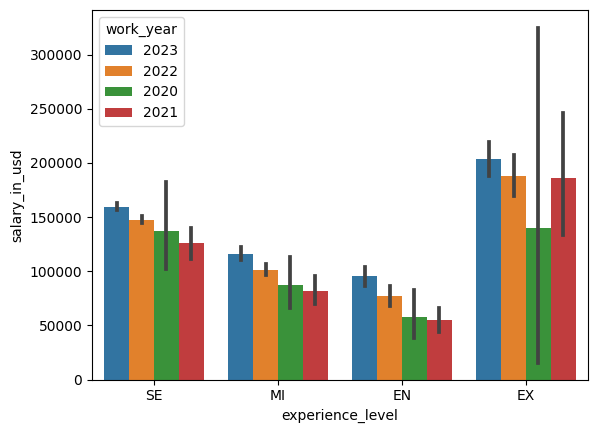

In [ ]:
sns.barplot(x = df['experience_level'], y = df['salary_in_usd'], hue = df['work_year'])
plt.show()

Below plot tells us that full time employess are paid the most in large, small and medium companies while part time employees and freelancers are paid less than than full time employees and contracters. Contracters in large companies are paid significantly more than in small amd medium companies.




<Axes: xlabel='employment_type', ylabel='salary_in_usd'>

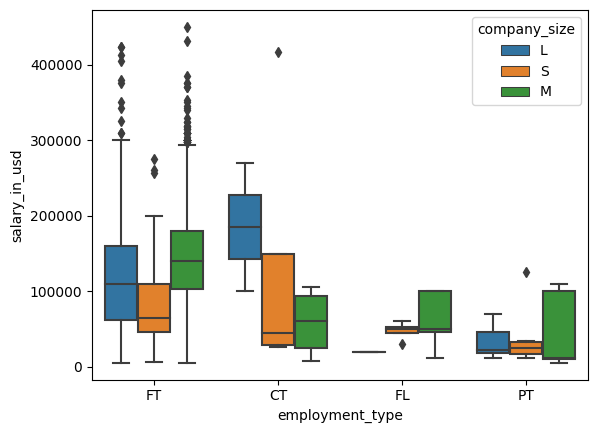

In [ ]:
sns.boxplot(x = df['employment_type'], y = df['salary_in_usd'],hue = df['company_size'] )
plt.show()

Here we observe that companies of all sizes pay more when 0% work is done remotely. It is interesting to note that the least paid employees are working 50% only remotely while the 100% remote employees enjoy a higher pay than them in all companies. Another interesting observation is that medium sized companies pay their non-remote employees almost the same.

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

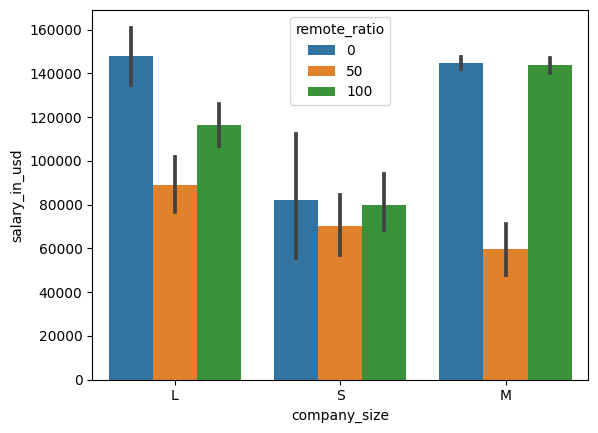

In [ ]:
sns.barplot(x= df['company_size'], y = df['salary_in_usd'],hue = df['remote_ratio'] )
plt.show()

The majority of individuals in this dataset appear to work from office settings. Additionally, there is noticeable variation in salaries across different job categories.

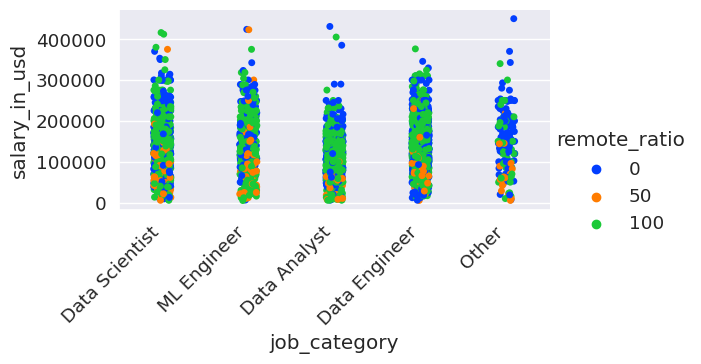

In [28]:
g = sns.catplot(
        x='job_category',
        y='salary_in_usd',
        data=df,
        palette='bright',
        height=3,
        aspect=2,
        #split=False,
        #split=True
        kind='strip',
        hue='remote_ratio')
g.set_xticklabels(
        rotation=45,
        ha='right')
plt.show()

The heatmap analysis reveals a positive correlation between higher levels of experience and higher salaries. Additionally, job categories such as "ML Engineer" and "Data Scientist" are associated with higher compensation levels.

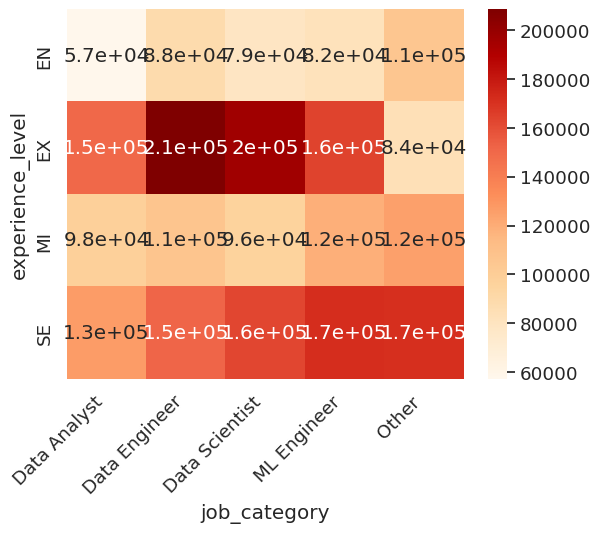

In [ ]:
df_heatmap = df.pivot_table(values='salary_in_usd',index='experience_level',columns='job_category')
cc = sns.heatmap(df_heatmap,annot=True,cmap='OrRd')
cc.set_xticklabels(cc.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()